# Kaggle Competition

##Exploratory Data Analysis

In [69]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#load data
filepath = 'https://raw.githubusercontent.com/fedeamedeo/machine-learning-project/main/Data/'
interactions = pd.read_csv(filepath + 'interactions_train.csv')
items = pd.read_csv(filepath + 'items.csv')

In [71]:
#display data
display(interactions.head())
display(items.head())

,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


In [72]:
# Check for duplicates in the interactions DataFrame
duplicates = interactions.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows in interactions: {num_duplicates}")

# Display the duplicate rows if any
if num_duplicates > 0:
    print("Duplicate rows:")
    print(interactions[duplicates])

Number of duplicate rows in interactions: 2
Duplicate rows:
          u      i             t
6103   7210  12290  1.718023e+09
44025  1323  10037  1.700055e+09


In [73]:
# Drop duplicate rows from the interactions DataFrame
interactions = interactions.drop_duplicates()

# Verify the shape after dropping duplicates
print(f"Shape after dropping duplicates: {interactions.shape}")

Shape after dropping duplicates: (87045, 3)


In [ ]:
# 1. Basic Statistics
print("Basic Statistics:")
print(f"Number of unique users: {interactions['u'].nunique()}")
print(f"Number of unique items: {interactions['i'].nunique()}")
print(f"Time range: {interactions['t'].min()} to {interactions['t'].max()}")

# 2. Interactions per User
user_interactions = interactions['u'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

# 3. Interactions per Item
item_interactions = interactions['i'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(item_interactions, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Items')
plt.show()

# 5. Top Users and Items
top_users = user_interactions.head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

top_items = item_interactions.head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

# 7. Merge with Metadata
interactions_with_items=pd.merge(interactions, items, on='i')
print("Sample of interactions_with_items dataset:")
print(interactions_with_items.head())

# 8. Missing Data in merged df
print("Missing Data in interactions_with_items:")
print(interactions_with_items.isnull().sum())

In [ ]:
# Distribution of publishers
plt.figure(figsize=(12, 6))
top_publishers = items['Publisher'].value_counts().head(15)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 15 Publishers')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()



# Author analysis
plt.figure(figsize=(10, 6))
author_counts = items['Author'].value_counts().head(10)
sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title('Top 10 Authors by Number of Items')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()

# Subject analysis
# Extract and count subjects (handling multiple subjects per item)
all_subjects = []
for subjects in items['Subjects'].dropna():
    subject_list = str(subjects).split(';')
    all_subjects.extend([subj.strip() for subj in subject_list])

subject_counts = pd.Series(all_subjects).value_counts()
plt.figure(figsize=(12, 6))
top_subjects = subject_counts.head(15)
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette='mako')
plt.title('Top 15 Subjects')
plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.show()

# Analyze book popularity based on interactions
if 'interactions' in globals():
    plt.figure(figsize=(10, 6))

    # Reset the index of value_counts to create a DataFrame
    item_interaction_counts = interactions['i'].value_counts().reset_index()
    item_interaction_counts.columns = ['i', 'count']  # Rename columns for clarity

    # Merge with the items dataset
    items_with_interactions = items.merge(item_interaction_counts, on='i', how='left')
    items_with_interactions['interaction_count'] = items_with_interactions['count'].fillna(0)


    # Plot the distribution of interactions
    plt.hist(items_with_interactions['interaction_count'], bins=50, log=True)
    plt.title('Distribution of Interactions per Item (Log Scale)')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Number of Items')
    plt.show()

    # Correlation between metadata and popularity
    # Create indicator for having Author information
    items_with_interactions['has_author'] = items_with_interactions['Author'].notna().astype(int)
    items_with_interactions['has_subjects'] = items_with_interactions['Subjects'].notna().astype(int)

    # Create title length feature
    items_with_interactions['title_length'] = items_with_interactions['Title'].str.len()

    # Analyze correlation with popularity
    features = ['has_author', 'has_subjects', 'title_length']
    corr = items_with_interactions[features + ['interaction_count']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation between Item Features and Popularity')
    plt.tight_layout()
    plt.show()

In [ ]:
# Analyzing missing values in the datasets
print("Missing values in items dataset:")
missing_items = items.isnull().sum()
print(missing_items)
print("\nPercentage of missing values in items dataset:")
print((missing_items / len(items) * 100).round(2))

print("\nMissing values in interactions_with_items dataset:")
missing_interactions = interactions_with_items.isnull().sum()
print(missing_interactions)
print("\nPercentage of missing values in interactions_with_items dataset:")
print((missing_interactions / len(interactions_with_items) * 100).round(2))

# Visualizing missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(interactions_with_items.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Items Dataset')
plt.tight_layout()
plt.show()

##Data enhancement with API (to be completed)

In [ ]:
'''#version using Google Books and Open Library as fallback
import requests
import time
import pandas as pd
from tqdm.notebook import tqdm

# Copy original items table
items_improved = items.copy()

# --- UTILITY FUNCTIONS ---

# Extract first valid ISBN from a semicolon-separated field
def extract_first_isbn(isbn_field):
    if pd.isna(isbn_field):
        return None
    isbn_list = str(isbn_field).split(';')
    if len(isbn_list) > 0:
        isbn = ''.join(c for c in isbn_list[0].strip() if c.isdigit())
        return isbn
    return None

# Fetch metadata from Google Books API
def fetch_book_metadata_google(isbn):
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if items:
                info = items[0].get("volumeInfo", {})
                author = info.get("authors", [None])[0]
                publisher = info.get("publisher")
                subject = info.get("categories", [None])[0]
                return author, publisher, subject
    except Exception as e:
        print(f"Google Books error for ISBN {isbn}: {e}")
    return None, None, None

# Fetch metadata from Open Library API
def fetch_book_metadata_openlibrary(isbn):
    url = f"https://openlibrary.org/isbn/{isbn}.json"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            author = None
            if "authors" in data and data["authors"]:
                author_key = data["authors"][0]["key"]
                auth_response = requests.get(f"https://openlibrary.org{author_key}.json")
                if auth_response.status_code == 200:
                    author = auth_response.json().get("name")
            publisher = data.get("publishers", [None])[0]
            subject = data.get("subjects", [None])[0] if data.get("subjects") else None
            return author, publisher, subject
    except Exception as e:
        print(f"Open Library error for ISBN {isbn}: {e}")
    return None, None, None

# --- ENRICHMENT PROCESS ---

# Identify rows with missing Author or Subjects and valid ISBN
missing_data = items_improved[
    (items_improved['Author'].isna() | items_improved['Subjects'].isna()) &
    (~items_improved['ISBN Valid'].isna())
]

print(f"\nBooks needing metadata: {len(missing_data)}")

successful_fetches = 0

for idx in tqdm(missing_data.index):
    isbn = extract_first_isbn(items_improved.at[idx, 'ISBN Valid'])
    if not isbn:
        continue

    need_author = pd.isna(items_improved.at[idx, 'Author'])
    need_subject = pd.isna(items_improved.at[idx, 'Subjects'])
    need_publisher = pd.isna(items_improved.at[idx, 'Publisher'])

    # First try Google Books
    author, publisher, subject = fetch_book_metadata_google(isbn)

    # If not found, try Open Library
    if not author and not subject and not publisher:
        author, publisher, subject = fetch_book_metadata_openlibrary(isbn)

    if author and need_author:
        items_improved.at[idx, 'Author'] = author
        successful_fetches += 1

    if subject and need_subject:
        items_improved.at[idx, 'Subjects'] = subject
        successful_fetches += 1

    if publisher and need_publisher:
        items_improved.at[idx, 'Publisher'] = publisher

    time.sleep(0.1)  # Respect API rate limits

# Final fallback for truly missing values
items_improved['Author'].fillna("Unknown Author", inplace=True)
items_improved['Subjects'].fillna("Uncategorized", inplace=True)
items_improved['Publisher'].fillna("Unknown Publisher", inplace=True)
items_improved['ISBN Valid'].fillna("Not Available", inplace=True)

# Print results
print(f"\nSuccessful metadata fetches: {successful_fetches}")
print("Remaining missing values:")
print(items_improved.isnull().sum())

# Merge back with interaction data
interactions_with_items_improved = interactions.merge(items_improved, on='i', how='left')
print("\nSample of enhanced data:")
print(interactions_with_items_improved.sample(5))


In [ ]:
'''# Analyzing missing values after enhancement
print("Missing values in items dataset:")
missing_items = items_improved.isnull().sum()
print(missing_items)
print("\nPercentage of missing values in items_improved dataset:")
print((missing_items / len(items_improved) * 100).round(2))

print("\nMissing values in interactions_with_items_improved dataset:")
missing_interactions = interactions_with_items_improved.isnull().sum()
print(missing_interactions)
print("\nPercentage of missing values in interactions_with_items_improved dataset:")
print((missing_interactions / len(interactions_with_items_improved) * 100).round(2))

# Visualizing missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(interactions_with_items_improved.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Improved Items Dataset')
plt.tight_layout()
plt.show()

In [ ]:
'''# Save the DataFrame to a CSV file
interactions_with_items_improved.to_csv('interactions_with_items_improved.csv', index=False)

# Download the file (Google Colab specific)
from google.colab import files
files.download('interactions_with_items_improved.csv')

## Splitting the data into test and train set

In [75]:
#Sort the interactions by user and time stamp
interactions = interactions.sort_values(["u", "t"])
interactions=interactions
interactions.head(10)

,u,i,t
21035,0,0,1.680191e+09
28842,0,1,1.680783e+09
3958,0,2,1.680801e+09
29592,0,3,1.683715e+09
6371,0,3,1.683715e+09
41220,0,4,1.686569e+09
12217,0,5,1.687014e+09
19703,0,6,1.687014e+09
64522,0,7,1.687014e+09
29380,0,8,1.687260e+09


In [76]:
#Get a proportional ranking of the timestamps for each user
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
interactions.reset_index(inplace=True, drop=True)
interactions.head(10)

,u,i,t,pct_rank
0,0,0,1.680191e+09,0.04
1,0,1,1.680783e+09,0.08
2,0,2,1.680801e+09,0.12
3,0,3,1.683715e+09,0.16
4,0,3,1.683715e+09,0.20
5,0,4,1.686569e+09,0.24
6,0,5,1.687014e+09,0.28
7,0,6,1.687014e+09,0.32
8,0,7,1.687014e+09,0.36
9,0,8,1.687260e+09,0.40


In [77]:
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

In [78]:
#Function to define ground truth matrix
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        data_matrix[row.u, row.i] = 1  # Binary representation of interaction
    return data_matrix



# Map user and item IDs to zero-based indices
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

# Split the data into training and testing sets
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]

# Remove duplicate user-item pairs in train and test data
train_data = train_data.drop_duplicates(subset=["u", "i"])
test_data = test_data.drop_duplicates(subset=["u", "i"])

# Get the number of unique users and items
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Print results
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Train data size: {train_data.shape[0]}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")
print(f"Test data size: {test_data.shape[0]}")

Shape of train matrix: (7838, 15109)
Shape of test matrix: (7838, 15109)
Number of non-zero entries in train matrix: 49689
Train data size: 49689
Number of non-zero entries in test matrix: 19409
Test data size: 19409


## Creating User-Item Matrices for Implicit Feedback

In [79]:
import numpy as np

# Define a function to create the data matrix
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    data_matrix[data["u"].values, data["i"].values] = 1
    return data_matrix

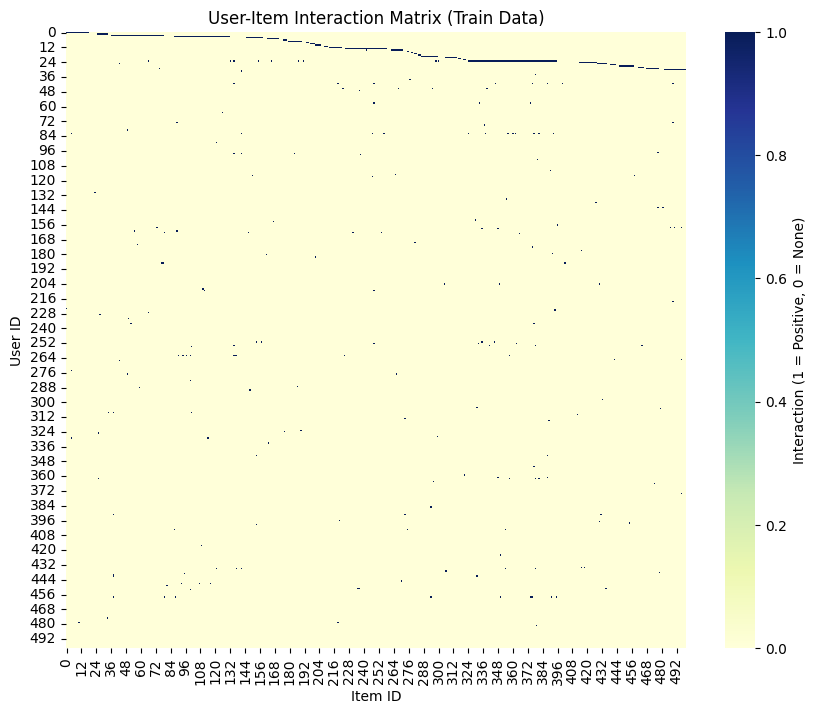

In [80]:
# Function to plot a heatmap for a subset of the user-item matrix
def plot_interaction_heatmap(data_matrix, title, num_users=500, num_items=500):
    """
    Plots a heatmap of a subset of the user-item interaction matrix.
    Parameters:
        data_matrix: The matrix to visualize.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization purposes
    matrix_subset = data_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the training and testing matrices
plot_interaction_heatmap(train_data_matrix, 'User-Item Interaction Matrix (Train Data)')

##Item-to-Item Collaborative Filtering with Implicit Feedback

In [81]:
# Compute the item-item similarity matrix
item_similarity = cosine_similarity(train_data_matrix.T)
print("Item-Item Similarity Matrix:")
print(item_similarity)
print(item_similarity.shape)

Item-Item Similarity Matrix:
[[1.         0.40824829 0.33333333 ... 0.         0.         0.        ]
 [0.40824829 1.         0.40824829 ... 0.         0.         0.        ]
 [0.33333333 0.40824829 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(15109, 15109)


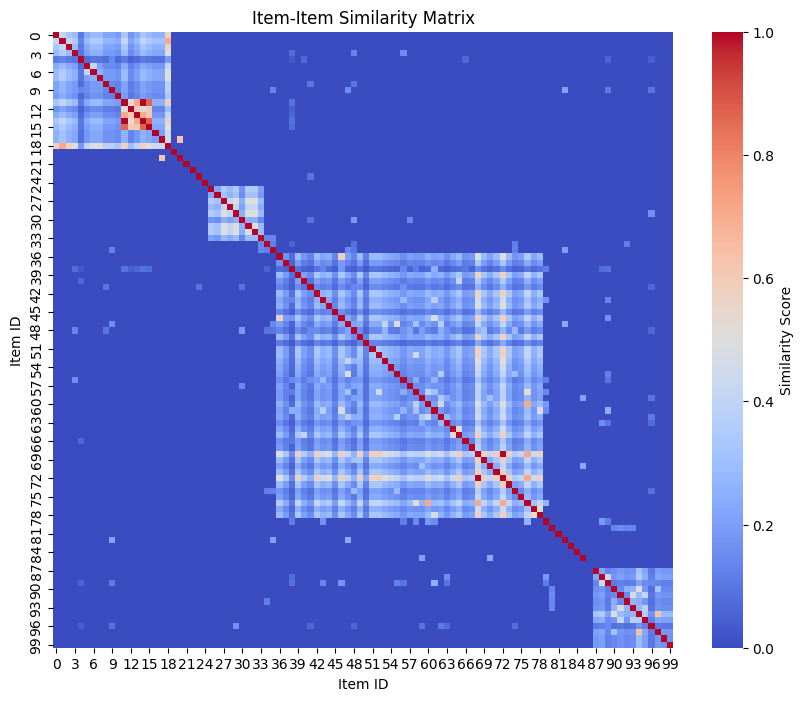

In [82]:
# Function to visualize the item similarity matrix
def plot_item_similarity_heatmap(similarity_matrix, title, num_items=100):
    """
    Plots a heatmap of a subset of the item similarity matrix.
    Parameters:
        similarity_matrix: The item-item similarity matrix.
        title: The title of the plot.
        num_items: The number of items to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_items, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the item similarity matrix
plot_item_similarity_heatmap(item_similarity, 'Item-Item Similarity Matrix')

In [83]:
# Define the function to predict interactions based on item similarity
def item_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on item-item similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The item-item similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # np.dot does the matrix multiplication. Here we are calculating the
    # weighted sum of interactions based on item similarity
    pred = similarity.dot(interactions.T) / (similarity.sum(axis=1)[:, np.newaxis] + epsilon)
    return pred.T  # Transpose to get users as rows and items as columns

# Calculate the item-based predictions for positive interactions
item_prediction = item_based_predict(train_data_matrix, item_similarity)
print("Predicted Interaction Matrix:")
print(item_prediction)
print(item_prediction.shape)

Predicted Interaction Matrix:
[[0.46097255 0.85435984 0.71867834 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


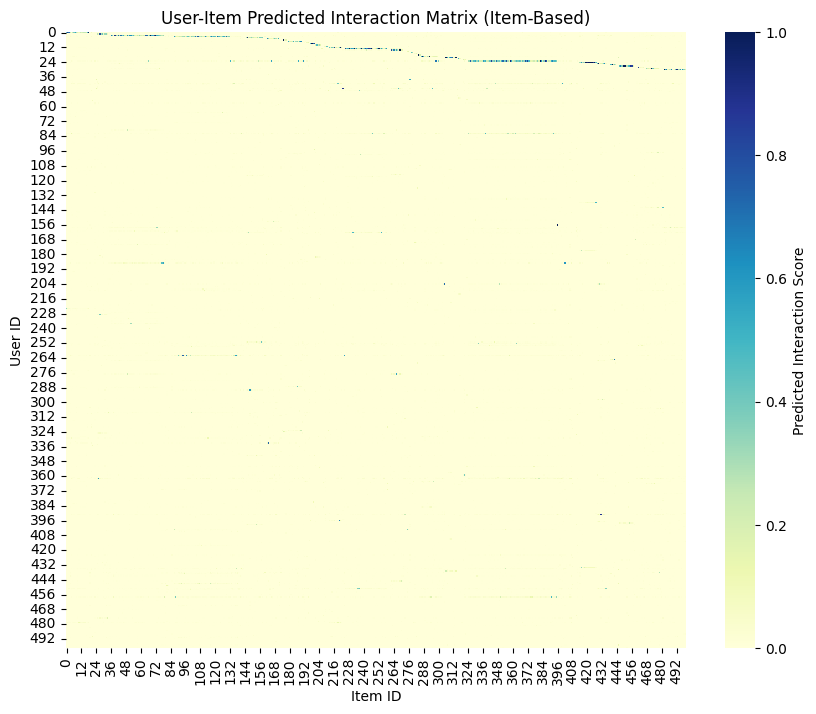

In [84]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=500, num_items=500):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(item_prediction, 'User-Item Predicted Interaction Matrix (Item-Based)')

##User-to-User CF

In [85]:
# Compute the user-user similarity matrix
user_similarity = cosine_similarity(train_data_matrix)
print("User-User Similarity Matrix:")
print(user_similarity)

# Check the shape as a sanity check
print("Shape of User Similarity Matrix:", user_similarity.shape)

User-User Similarity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Shape of User Similarity Matrix: (7838, 7838)


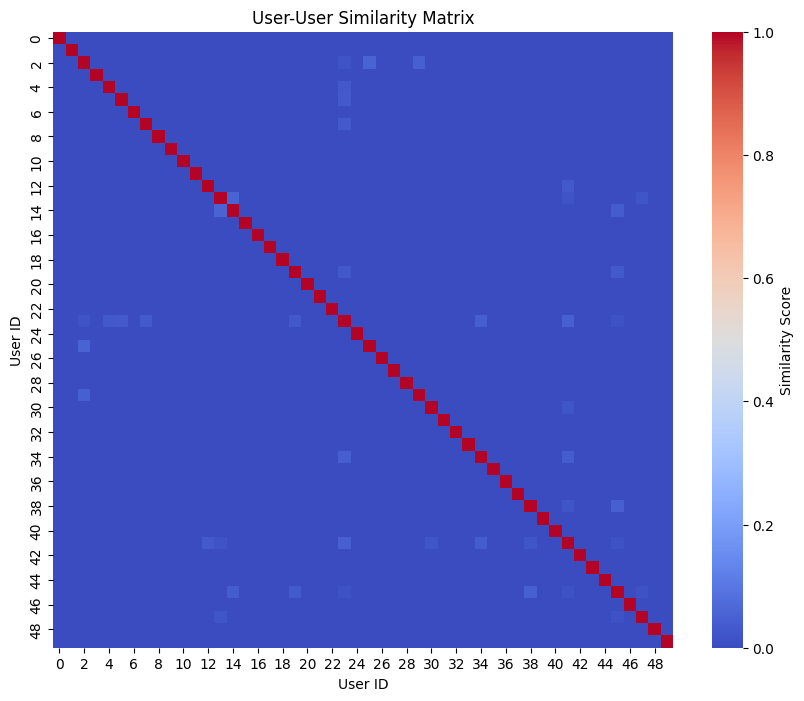

In [86]:
# Function to plot the user similarity matrix
def plot_user_similarity_heatmap(similarity_matrix, title, num_users=50):
    """
    Plots a heatmap of a subset of the user similarity matrix.
    Parameters:
        similarity_matrix: The user-user similarity matrix.
        title: The title of the plot.
        num_users: The number of users to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_users, :num_users]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('User ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the user similarity matrix
plot_user_similarity_heatmap(user_similarity, 'User-User Similarity Matrix')

In [87]:
# Define the function to predict interactions based on user similarity
def user_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on user-user similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The user-user similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # Calculate the weighted sum of interactions based on user similarity
    pred = similarity.dot(interactions) / (np.abs(similarity).sum(axis=1)[:, np.newaxis] + epsilon)
    return pred

# Calculate the user-based predictions for positive interactions
user_prediction = user_based_predict(train_data_matrix, user_similarity)
print("Predicted Interaction Matrix (User-Based):")
print(user_prediction)
print(user_prediction.shape)

Predicted Interaction Matrix (User-Based):
[[0.13171649 0.13259591 0.14274867 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


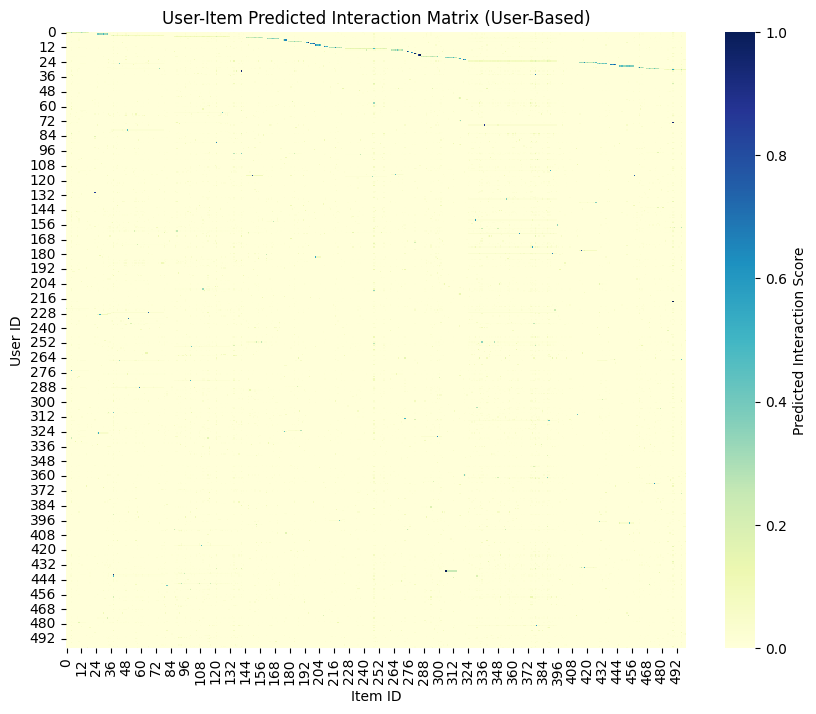

In [88]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=500, num_items=500):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(user_prediction, 'User-Item Predicted Interaction Matrix (User-Based)')

##Evaluating Our Recommenders

In [89]:
#Defining the function for precision and recall @K
def precision_recall_at_k(prediction, ground_truth, k=10):
    """
    Calculates Precision@K and Recall@K for top-K recommendations.
    Parameters:
        prediction (numpy array): The predicted interaction matrix with scores.
        ground_truth (numpy array): The ground truth interaction matrix (binary).
        k (int): Number of top recommendations to consider.
    Returns:
        precision_at_k (float): The average precision@K over all users.
        recall_at_k (float): The average recall@K over all users.
    """
    num_users = prediction.shape[0]
    precision_at_k, recall_at_k = 0, 0

    for user in range(num_users):
        # Get the indices of the top-K items for the user based on predicted scores
        top_k_items = np.argsort(prediction[user, :])[-k:]

        # Calculate the number of relevant items in the top-K items for the user
        relevant_items_in_top_k = np.isin(top_k_items, np.where(ground_truth[user, :] == 1)[0]).sum()

        # Calculate the total number of relevant items for the user
        total_relevant_items = ground_truth[user, :].sum()

        # Precision@K and Recall@K for this user
        precision_at_k += relevant_items_in_top_k / k
        recall_at_k += relevant_items_in_top_k / total_relevant_items if total_relevant_items > 0 else 0

    # Average Precision@K and Recall@K over all users
    precision_at_k /= num_users
    recall_at_k /= num_users

    return precision_at_k, recall_at_k

In [90]:
#Precision and recall @k for user- and item-based CF
precision_user_k, recall_user_k = precision_recall_at_k(user_prediction, test_data_matrix, k=10)
precision_item_k, recall_item_k = precision_recall_at_k(item_prediction, test_data_matrix, k=10)

print('User-based CF Precision@K:', precision_user_k)
print('User-based CF Recall@K:', recall_user_k)
print('Item-based CF Precision@K:', precision_item_k)
print('Item-based CF Recall@K:', recall_item_k)

User-based CF Precision@K: 0.05657055371268457
User-based CF Recall@K: 0.29066636179845007
Item-based CF Precision@K: 0.055639193671857864
Item-based CF Recall@K: 0.26401546197183495


In [91]:
# prompt: write some code calculating the mean average precisions @10

def mean_average_precision_at_k(predictions, true_positives, k=10):
    """
    Calculates the Mean Average Precision@K (MAP@K) metric.

    Args:
        predictions (numpy.ndarray): A matrix of predicted relevance scores
                                      (users x items).
        true_positives (numpy.ndarray): A binary matrix of true positive interactions
                                        (users x items).
        k (int): The cutoff value for the top-k recommendations.

    Returns:
        float: The MAP@K score.
    """
    map_at_k = 0
    n_users = predictions.shape[0]

    for user in range(n_users):
        predicted_ranks = np.argsort(predictions[user])[::-1][:k]  # Top k predictions
        true_positives_in_rank = np.isin(predicted_ranks, np.where(true_positives[user] == 1)[0])

        precision_at_i = []
        for i in range(k):
            if true_positives_in_rank[i]:  # Check if item at rank i is a true positive
                precision_at_i.append(np.sum(true_positives_in_rank[:i+1]) / (i+1))

        if len(precision_at_i) > 0:  # To avoid division by zero if no relevant items are predicted
            average_precision = np.sum(precision_at_i) / np.sum(true_positives[user])
        else:
            average_precision = 0

        map_at_k += average_precision
map_at_k /= n_users  # Average over all users
    return map_at_k


# Calculate MAP@10 for user-based CF
map_user_10 = mean_average_precision_at_k(user_prediction, test_data_matrix, k=10)
print(f"User-based CF MAP@10: {map_user_10}")


# Calculate MAP@10 for item-based CF
map_item_10 = mean_average_precision_at_k(item_prediction, test_data_matrix, k=10)
print(f"Item-based CF MAP@10: {map_item_10}")


IndentationError: unexpected indent (<ipython-input-91-e7eb638d6ece>, line 36)

In [92]:
reverse_item_mapping = {v: k for k, v in item_id_mapping.items()}
reverse_user_mapping = {v: k for k, v in user_id_mapping.items()}
def create_recommendations_csv(predictions_matrix, name='recommendations.csv'):
    user_based_recommendations = []

    for user_id in range(predictions_matrix.shape[0]):
        top_10_item_ids = np.argsort(predictions_matrix[user_id])[-10:][::-1]

        # Map back to original IDs
        original_user_id = reverse_user_mapping[user_id]
        original_item_ids = [reverse_item_mapping[i] for i in top_10_item_ids]

        top_10_items_str = " ".join(map(str, original_item_ids))
        user_based_recommendations.append([original_user_id, top_10_items_str])

    recommendations_df = pd.DataFrame(user_based_recommendations, columns=['user_id', 'recommendation'])
    recommendations_df.to_csv(name, index=False)

    # Optional: comment out Colab download if not using it
    from google.colab import files
    files.download(name)

    print("Recommendations CSV created successfully.")
    return recommendations_df


In [93]:
create_recommendations_csv(user_prediction)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recommendations CSV created successfully.


,user_id,recommendation
0,0,13 4 12 15 14 11 8 10 9 5
1,1,34 30 29 37 31 32 33 36 35 1573
2,2,46 58 53 49 56 82 64 75 45 67
3,3,149 40 138 155 128 142 143 156 133 139
4,4,202 198 191 203 193 201 197 196 199 195
...,...,...
7833,7833,975 7322 3910 3151 4235 3121 5116 5117 3245 5118
7834,7834,13891 7128 15276 8999 13890 8413 7129 101 3019...
7835,7835,3055 4820 11126 1367 53 45 3019 8999 2125 8367
7836,7836,14550 3471 611 8999 14557 10914 14555 7115 139...
